In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

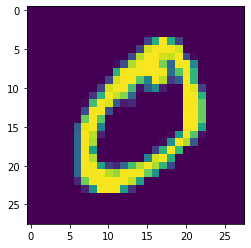

In [6]:
plt.imshow(x_train[1])

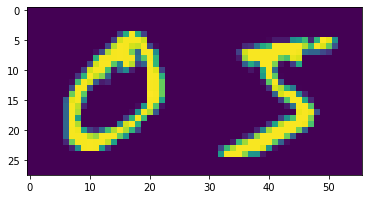

In [16]:
plt.imshow(np.hstack([x_train[1], x_train[0]]))

In [112]:
x_train_double =[]
for x in range(1,x_train.shape[0]):
    x_train_double.append(np.hstack([x_train[x-1], x_train[x]]))
x_train_double =np.array(x_train_double)

x_test_double =[]
for x in range(1,x_test.shape[0]):
    x_test_double.append(np.hstack([x_test[x-1], x_test[x]]))
x_test_double =np.array(x_test_double)

In [44]:
y_train_double=[]
for x in range(1, y_train.shape[0]):
    y_train_double.append(int(str(y_train[x-1])+str(y_train[x])))
    
y_test_double=[]
for x in range(1, y_test.shape[0]):
    y_test_double.append(int(str(y_test[x-1])+str(y_test[x])))

In [238]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(100, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [239]:
model.fit(x_train, y_train, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 29s 477us/sample - loss: 0.2331 - acc: 0.9311
Epoch 2/2
60000/60000 [==============================] - 23s 388us/sample - loss: 0.1119 - acc: 0.9659


In [137]:
model.evaluate(x_test_double, y_test_double)

9999/9999 [==============================] - 3s 280us/sample - loss: 2.3266 - acc: 0.8906


[2.3266320316856706, 0.89058906]

In [240]:
predictions_double=[]
for x in x_test_double:
    predictions_double.append(GetPrediction(x))

In [241]:
accuracy_score(predictions_double, y_test_double)

0.9380938093809381

In [232]:
def GetPrediction (array):
    preds=''
    picturesnum = array.shape[1]//28
    for x in np.hsplit(array,picturesnum):
        preds+=(str(int(model.predict_classes(np.expand_dims(x, axis=0)))))
    return int(preds)

In [195]:
GetPrediction(x_test_double[6])

'49'

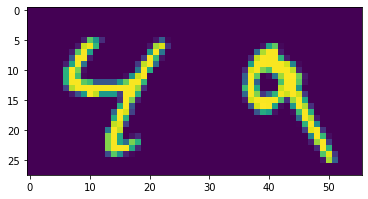

In [196]:
plt.imshow(x_test_double[6])

In [207]:
x_train_quadriple =[]
for x in range(3,x_train_double.shape[0]):
    x_train_quadriple.append(np.hstack([x_train_double[x-3], x_train_double[x]]))
x_train_quadriple =np.array(x_train_quadriple)

x_test_quadriple =[]
for x in range(3,x_test_double.shape[0]):
    x_test_quadriple.append(np.hstack([x_test_double[x-3], x_test_double[x]]))
x_test_quadriple =np.array(x_test_quadriple)

In [217]:
y_train_quadriple=[]
for x in range(3, len(y_train_double)):
    y_train_quadriple.append(int(str(y_train_double[x-3])+str(y_train_double[x])))
    
y_test_quadriple=[]
for x in range(3, len(y_test_double)):
    y_test_quadriple.append(int(str(y_test_double[x-3])+str(y_test_double[x])))

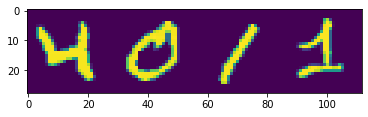

In [211]:
plt.imshow(x_train_quadriple[20])

In [236]:
predictions_quadriple=predictions_quadriple_int

In [219]:
predictions_quadriple=[]
for x in x_test_quadriple:
    predictions_quadriple.append(GetPrediction(x))

In [226]:
from sklearn.metrics import accuracy_score

In [237]:
accuracy_score(predictions_quadriple, y_test_quadriple)

0.8036214485794317

In [222]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,112)),
    tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10000, activation=tf.nn.softmax)
])
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [225]:
model2.fit(x_train_quadriple, y_train_quadriple, epochs=3)

Epoch 1/3
59996/59996 [==============================] - 122s 2ms/sample - loss: 7.4284 - acc: 0.0325
Epoch 2/3
59996/59996 [==============================] - 114s 2ms/sample - loss: 6.4050 - acc: 0.0673
Epoch 3/3
59996/59996 [==============================] - 112s 2ms/sample - loss: 5.6346 - acc: 0.1070


In [228]:
model2.evaluate(x_test_quadriple, y_test_quadriple)

9996/9996 [==============================] - 8s 841us/sample - loss: 37.8813 - acc: 0.1367


[37.881270305878544, 0.13665466]

In [218]:
y_test_quadriple[4]

4195

In [ ]:
class NumberOfPictures(tf.keras.layers.Layer):
  def __init__(self, num_outputs, input):
    super(MyDenseLayer, self).__init__()
    self.input_shape = input.shape[1:]
    self.num_outputs = input_shape[1]//28

  def build(self, input_shape):
    self.kernel = self.add_variable("kernel",
                                    shape=[int(input_shape[-1]),
                                           self.num_outputs])

  def call(self, input):
    return tf.matmul(input, self.kernel)